In [1]:
%matplotlib inline
import pylab as plt
import jax.numpy as jnp
import seaborn as snb

from scipy.stats import binom as binom_dist
from scipy.stats import beta as beta_dist
from scipy.special import beta as beta_fun
from scipy.special import binom 
import importlib


snb.set_style('darkgrid')
snb.set(font_scale=1.5)
plt.rcParams['lines.linewidth'] = 3


# **Part 1: The beta-binomial model**

Your friend has set up a website for her new business. So far $N = 115$ potential customers have visited her site, but only $y = 4$ customers have completed a purchase. To plan her future investments, she asks you for help to compute the probability that at least one of the next $N^* = 20$ customers will make a purchase.

You decide to model the problem using the beta-binomial model with a uniform prior distribution on the probability of making a purchase $\theta \in [0,1]$:

$$
\theta \sim \text{Beta}(a_0, b_0),
$$

$$
y | \theta \sim \text{Binomial}(N, \theta)
$$

where $a_0 = b_0 = 1$.

### **Task 1.1: Compute the prior mean of $\theta$ and provide a 95%-credibility interval for the prior.**

*Hint:* See Section 4.6.6 in Murphy for details on posterior/credibility intervals. The book discusses intervals for posterior distribution, but we can also use credibility intervals to summarize prior distributions.


Our prior $p(\theta)$ follows the beta distribution, i.e. $p(\theta) = \operatorname{Beta}(a_0, b_0)$ and  we know the parameters, $a_0 = 1, b_0 = 1$, we use the equation for the mean of beta distribution (obtained from slides Week 1), $\mathbb{E}[\theta]$, given by

$$
\mathbb{E}[\theta] = \frac{a}{a + b}.
$$

Plugging in, we obtain, 

$$
\begin{align*}
\mathbb{E}[\theta] &= \frac{1}{1 + 1}, \\
&= \frac{1}{2}.
\end{align*}
$$


The values of lower and upper credibility intervals are [0.025,0.975] respectively.


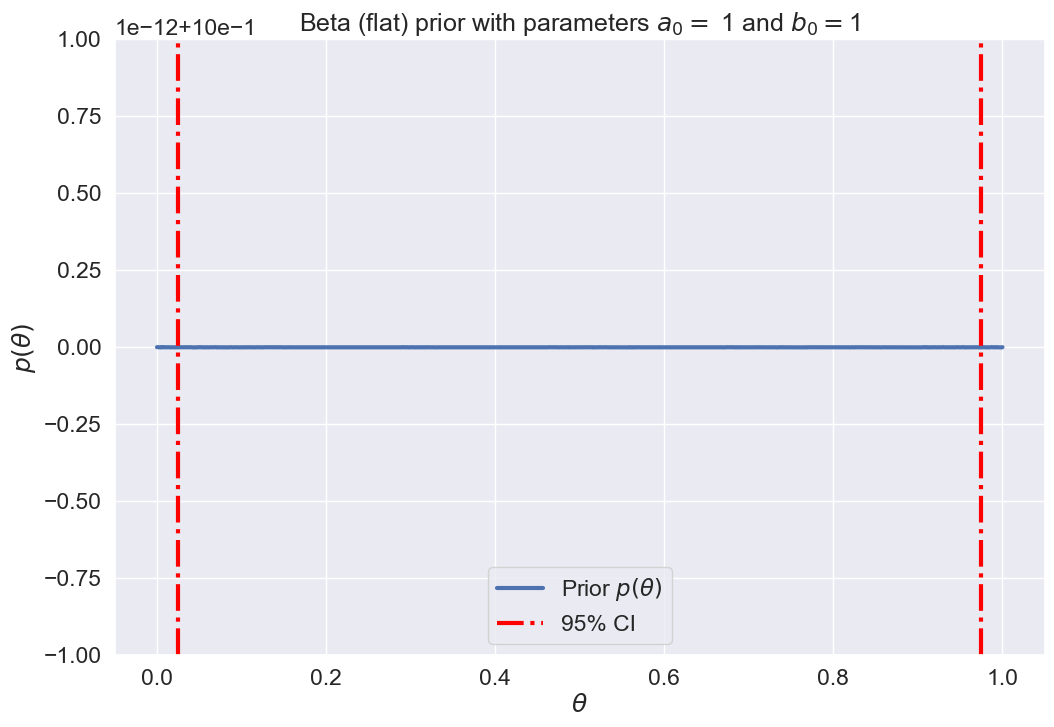

In [ ]:
# define the parameters 
N = 115
y = 4
a_0 = 1
b_0 = 1 

# define the grid for plotting of the prior
thetas = jnp.linspace(0, 1, 1000)

# define the prior
beta_prior = beta_dist.pdf(thetas, a_0, b_0)

interval = 0.95

lower_prior, upper_prior = beta_dist.interval(interval, a_0, b_0)

print(f"The values of lower and upper credibility intervals are [{lower_prior:.3f},{upper_prior}] respectively.")

plt.figure(figsize=(12, 8))
plt.plot(thetas, beta_prior, label=r'Prior $p(\theta)$')
plt.axvline(lower_prior, color='red', linestyle='-.', label='95% CI')
plt.axvline(upper_prior, color='red', linestyle='-.')
plt.title(rf'Beta (flat) prior with parameters $a_0 = $ {a_0} and $b_0 =${b_0}')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.savefig()
plt.show()


### **Task 1.2: Compute the posterior mean of $\theta$ and provide a 95%-credibility interval for the posterior.**

Since, the likelihood of clicks is modelled by the Binomail Distribution and our prior is a Beta distribution, the posterior has a closed solution, due to the beta prior is the conjugate model. We obtain the posterior by applying the Bayes rule, that is. The derivation of the posterior is given in the slides from a first week, and we just use results. We first find the parameters $a$ and $b$, which are given by,

$$
a = a_0 + y,
$$

$$
b = b_0 + N - y.
$$

The posterior mean is given by, 

$$
\mathbb{E}[\theta | y] = \frac{a}{a + b} = \frac{a_0 + y}{a_0 + b_0 + N}
$$


Plugging in the values, we obtain 

$$
\begin{align*}
\mathbb{E}[\theta | y] &= \frac{a_0 + y}{a_0 + b_0 + N} \\
&= \frac{1 + 4}{1 + 1 + 115 } \\
&= 0.042
\end{align*}
$$

The values of lower and upper credibility intervals are [0.014,0.086] respectively.


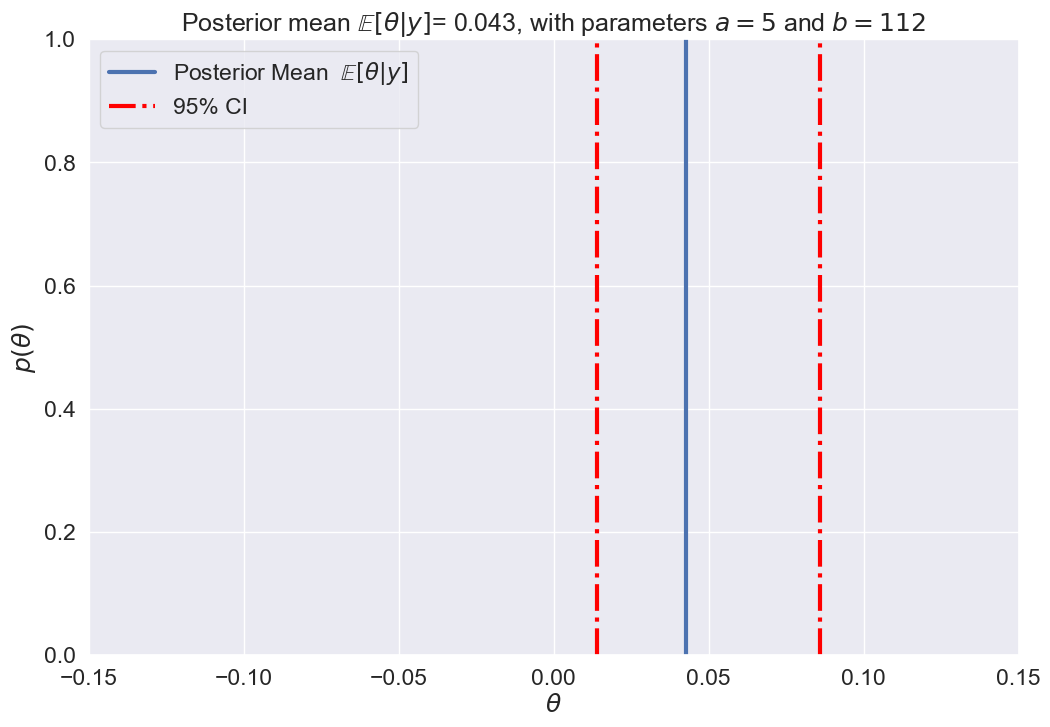

In [86]:
# posterior parameters 
a = a_0 + y
b = b_0 + N - y

posterior_mean = a / (a + b)

lower_post_mean, upper_post_mean = beta_dist.interval(interval, a, b)
#beta_dist.ppf([(1 - interval) / 2, (1 + interval) / 2], a, b)

###########_ALTERNATIVE_SOLUTION_FOR_THE_INTERVAL_#########################
# once can also use the beta.ppf as given in Murhpy
# https://github.com/probml/pyprobml/blob/master/notebooks/book1/04/beta_credible_int_demo.ipynb
# alpha = 0.05 
# l = beta.ppf(alpha / 2, a, b)
#u = beta.ppf(1 - alpha / 2, a, b)
#CI2 = (l, u)
#print("{:0.2f}--{:0.2f}".format(CI2[0], CI2[1]))  # (0.06:0.52)


print(f"The values of lower and upper credibility intervals are [{lower_post_mean:.3f},{upper_post_mean:.3f}] respectively.")

plt.figure(figsize=(12, 8))
plt.axvline(posterior_mean, label=r'Posterior Mean  $\mathbb{E}[\theta | y]$')
plt.axvline(lower_post_mean, color='red', linestyle='-.', label='95% CI')
plt.axvline(upper_post_mean, color='red', linestyle='-.')
plt.title(rf'Posterior mean $\mathbb{{E}}[\theta | y]$= {posterior_mean:.3f}, with parameters $a = {a}$ and $b = {b}$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.xlim(-0.15, 0.15)
plt.show()

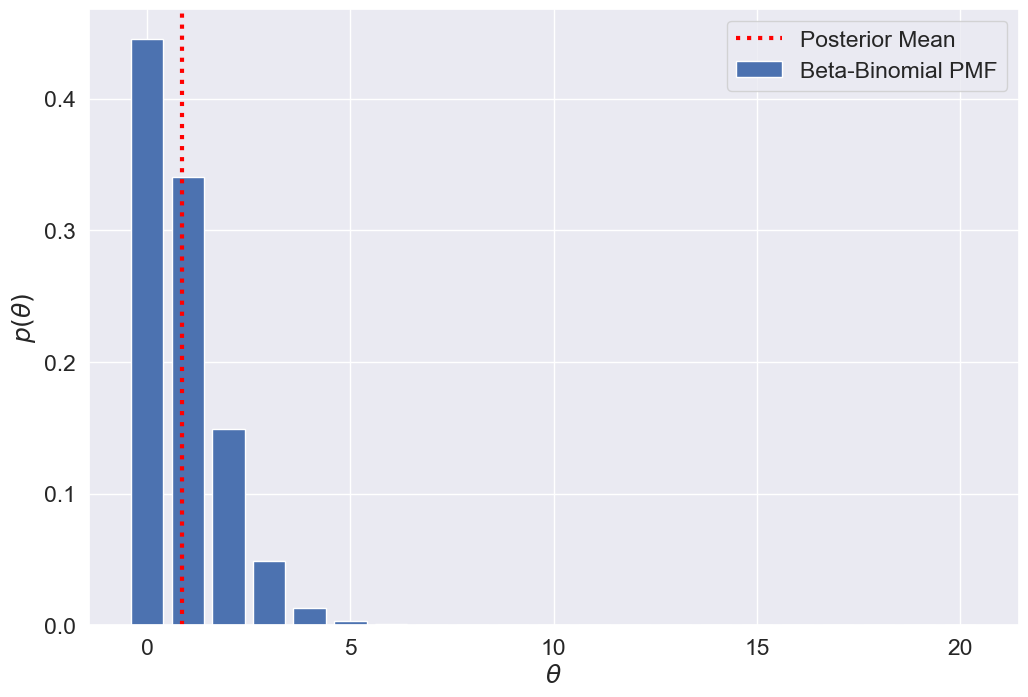

Probability of at least one purchase is p(y* ≥ 1 | N*=20)= 0.5543908502644446
Mean of the posterior predictive 0.8547008547008548
Variance of the posterior predictive 0.9499152480464954


In [140]:
from scipy.stats import binom, betabinom

rv = betabinom(20, a, b)
plt.figure(figsize=(12, 8))
plt.bar(ks, rv.pmf(ks), label='Beta-Binomial PMF')
plt.axvline(mean, color='red', linestyle=':', label='Posterior Mean')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.show()

#print(rv.pmf(ks))

mean, var = betabinom.stats(20, a, b, moments='mv')

prob_of_0_purchases = rv.pmf(ks)[0]

probability_of_at_least_one = 1 - prob_of_0_purchases

print(f"Probability of at least one purchase is p(y* ≥ 1 | N*=20)= {probability_of_at_least_one}")

print(F"Mean of the posterior predictive {mean}")
print(f"Variance of the posterior predictive {var}")


In [166]:
from scipy.special import beta, comb

N = 20
Ns = jnp.arange(0, N+1)

probabilities = []
for i in range(N+1):
    p = comb(N, i) * beta(a + i, b + N - i) / beta(a, b)
    probabilities.append(p)
    print(f"Probability for {i} customers: {p}")



Probability for 0 customers: 0.44560914973555676
Probability for 1 customers: 0.34015965628667755
Probability for 2 customers: 0.14914692621801132
Probability for 3 customers: 0.04855946435005001
Probability for 4 customers: 0.012898607717981707
Probability for 5 customers: 0.002925038600613266
Probability for 6 customers: 0.0005803648017089764
Probability for 7 customers: 0.00010214420510077822
Probability for 8 customers: 1.6062999995687313e-05
Probability for 9 customers: 2.2636205955980845e-06
Probability for 10 customers: 2.8573571452632825e-07
Probability for 11 customers: 3.220162072047205e-08
Probability for 12 customers: 3.220162072047321e-09
Probability for 13 customers: 2.8309117116897536e-10
Probability for 14 customers: 2.1591699495939935e-11
Probability for 15 customers: 1.4025377450353645e-12
Probability for 16 customers: 7.556776643509426e-14
Probability for 17 customers: 3.246901473426124e-15
Probability for 18 customers: 1.0443250353125056e-16
Probability for 19 custo

In [176]:
print(jnp.sum(Ns * jnp.array(probabilities)))

0.8547009


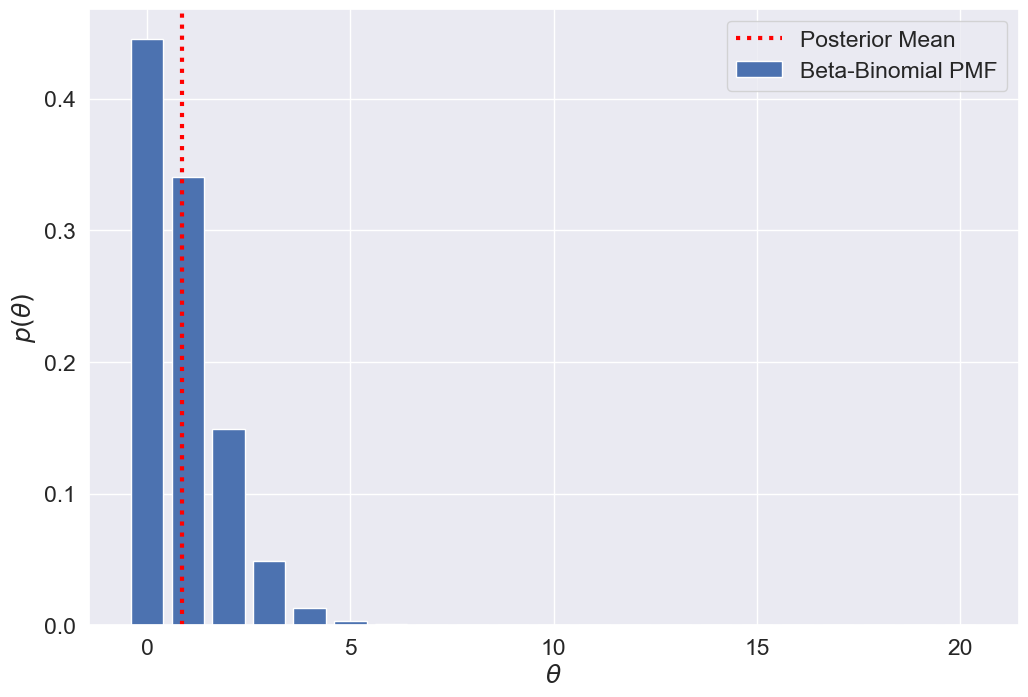

In [177]:
plt.figure(figsize=(12, 8))
plt.bar(Ns,probabilities, label='Beta-Binomial PMF')
plt.axvline(mean, color='red', linestyle=':', label='Posterior Mean')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.show()

# **Part 2: Linear Gaussian systems**

Let $\mathbf{z}_1, \mathbf{z}_2 \in \mathbb{R}^2$, and $y \in \mathbb{R}$ be random variables and consider the following linear Gaussian system:
$$
\begin{align*}
    \mathbf{z}_1 &\sim \mathcal{N}(0, vI)  \tag{3} \\
    \mathbf{z}_2 | \mathbf{z}_1 &\sim \mathcal{N}(\mathbf{z}_1, vI) \tag{4} \\
    y | \mathbf{z}_2 &\sim \mathcal{N}(\mathbf{a}^T \mathbf{z}_2, \tag{5}
\end{align*}
$$
where $\mathbf{a} \in \mathbb{R}^2$ is constant. The joint distribution of $(y, \mathbf{z}_1, \mathbf{z}_2)$ is given by

$\begin{equation}
    p(y, \mathbf{z}_1, \mathbf{z}_2) = p(y | \mathbf{z}_2) p(\mathbf{z}_2 | \mathbf{z}_1) p(\mathbf{z}_1). \tag{6}
\end{equation}
$
To solve this part, you will need the equations for linear Gaussian systems in section 3.3 in Murphy, as well as the basic rules of probability theory (sum rule, product rule, conditioning).

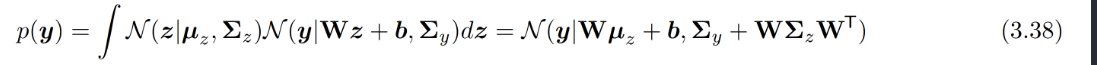


### **Task 2.1: Determine the distribution $p(y)$**

By the given hint, we first find $p(z_2)$, we use the euqation **3.38** from Murphy, and the equations (3) and (4), and we marginalize out $z_1$. 



$$
\begin{align}
p(z_2) &= \int \mathcal{N}(z_1 \vert 0, v \mathbf{I}) \mathcal{N}(z_2 \vert z_1, v \mathbf{I}) dz_1  &&&& \text{Using the equation 3.38 from Murphy, we obtain,} \\
&= \mathcal{N}(z_2 \vert z_1 \cdot 0 , v \mathbf{I} + 1 \cdot v \mathbf{I} \cdot 1^T), \\
&= \mathcal{N}(z_2 \vert 0, 2v \mathbf{I}).
\end{align}
$$

Now, by integrating the influence of $z_1$, we marginalize out $z_2$ to obtain the marginal of $p(y)$.

$$
\begin{align*}
p(y) &= \int p(z_2 \vert 0, 2v \mathbf{I}) \mathcal{N}(y \vert \mathbf{a}^T z_2, \sigma^2) dz_2 &&&& \text{Using the equation 3.38 from Murphy, we obtain,} \\
&= \mathcal{N}(y \vert a^T \cdot 0, \sigma^2 + a^T v \mathbf{I} a), \\
&= \mathcal{N}(y \vert 0, \sigma^2 +  a^T 2v \mathbf{I} a).
\end{align*}
$$


### **Task 2.2: Determine the distribution $p(y, z_2 | z_1)$**

To find the $p(y, z_2 \vert z_1)$ we use the formula Conditional formula, where we can express the conditional as a join distribution over our variables, divided by the conditioned variable $p(z_1)$.

$$
\begin{align*}
p(y, z_2 \vert z_1) &= \frac{p(y, z_2, z_1)}{p(z_1)} \\
&= \frac{p(y \vert z_2) p(z_2 \vert z_1) p(z_1)}{p(z_1)} && \text{Where, $p(z_1)$ cancels out and we obtain,} \\
&= p(y \vert z_2) p(z_2 \vert z_1) && \text{We find the mean by using equation 3.35 and 3.36 from Murphy,} \\
&= \mathcal{N}(z_2, y \vert \mu, \Sigma ) && \text{Where,} \\
\mu &= \begin{pmatrix} z_1 \\ a^T z_2 \end{pmatrix} \\
\Sigma &= \begin{pmatrix} v \mathbf{I} & v \mathbf{I} a \\ a^T v \mathbf{I} & \sigma^2 + a^T v \mathbf{I} a \end{pmatrix}
\end{align*}



### **Task 2.3 Determine the distribution $p(y | z_1)$**


We can use the formula from **Task 2.2** and marginalize out  $z_2$ to obtain the distribution $p(y \vert z_1)$. We use again the equation 3.38 from Murphy, and we obtain,

$$
\begin{align*}
p(y \vert z_1) &= \int p(y \vert z_2) p(z_2 \vert z_1) d z_2 \\
&= \int \mathcal{N}(z_1, v \mathbf{I}) \mathcal{N}(y \vert a^T z_2, \sigma^2) d z_2 \\
&= \mathcal{N}(y \vert a^T z_1, \sigma^2 + a^T v \mathbf{I} a).
\end{align*}

### **Task 2.4 Determine the distribution $p(z_1 | y)$**



By the provided hint, we use the Bayes theorem, to find the posterior distbituion $p(z_1 \vert y)$,

$$
\begin{align*}
p(z_1 \vert y) &= \frac{p(y \vert z_1) p(z_1)}{p(y)} && \text{We can disregard } p(y) \text{ as the posterior is proportional to the likelihood times the prior,} \\ 
&\propto p(y \vert z_1) p(z_1) && \text{Now, we plug in what we know} \\ 
&= \mathcal{N}(y \vert a^T z_1, \sigma^2 + a^T v \mathbf{I} a) \mathcal{N}(z_1 \vert 0, v \mathbf{I}) \\ 
&\text{To find the posterior mean and variance, we use Equation 3.37 from Murphy.} \\ 
&\text{First, we find the posterior variance } \Sigma^{-1}_{z_1 \vert y}: \\ 
\Sigma^{-1}_{z_1 \vert y} &= \frac{1}{v} \mathbf{I} + a \left( \frac{1}{\sigma^2 + a^T v \mathbf{I} a} \right) a^T \\ 
&\text{Now, we find the posterior mean,} \\ 
\mu_{z_1 \vert y} &= \Sigma_{z_1 \vert y} \left[ a \left( \frac{1}{\sigma^2 + a^T v \mathbf{I} a} \right) y + v \mathbf{I} \cdot 0 \right] \\ 
&= \Sigma_{z_1 \vert y} \left[ a \left( \frac{1}{\sigma^2 + a^T v \mathbf{I} a} \right) y \right] 
\end{align*}
$$


We can use the 